In [1]:
from splitstep_CMDNLS import *

## Evolving the Data
Takes about one hour.
First second :

In [2]:
deltax = 10000
dx = 0.05
x = np.arange(-deltax,deltax,dx)

u_0 = one_soliton(0,x) + 1/(x+2j)

T = 1.0
dt = 0.00005
u, t, xi = evolve(u_0, dx, T, dt, 200, 2)

Evolving this will use 0.64GB which is 4.57% of total available RAM and 4.58% of currently available RAM.
Evolving the gauge transformed data : 


  0%|          | 0/20000 [00:00<?, ?it/s]

Undoing the gauge transform : 


  0%|          | 0/100 [00:00<?, ?it/s]

## Animating the Simulation

MovieWriter ffmpeg unavailable; using Pillow instead.


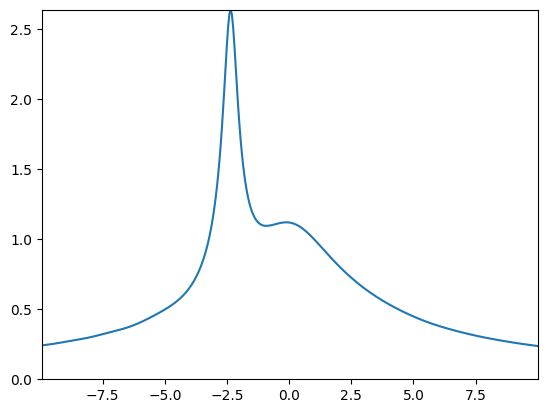

In [18]:
where = np.abs(x) < 10
anim = animate(np.abs(u[:,where]), t, x[where])
anim.save("animations/matt_test_1.gif")
display(HTML(anim.to_jshtml()))

## Energy Test

  0%|          | 0/100 [00:00<?, ?it/s]

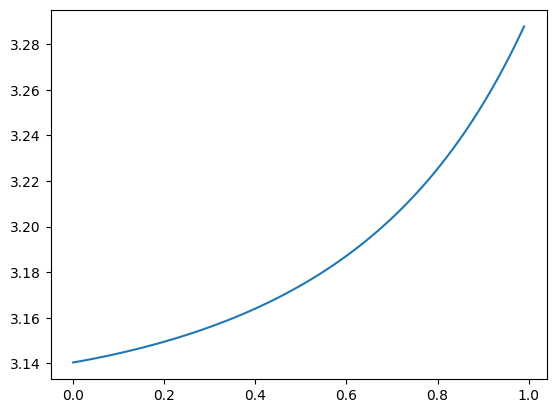

In [7]:
E = np.empty(len(t))
for i in tqdm(range(len(t))):
    E[i] = energy(u[i],dx,xi)
plt.plot(t,E)

## H_s norm test

  0%|          | 0/100 [00:00<?, ?it/s]

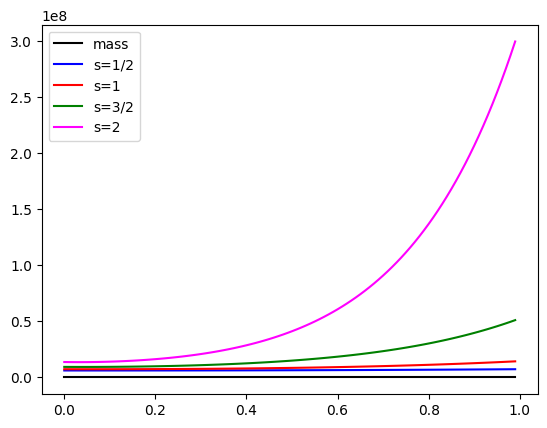

In [16]:
H = np.empty((5,len(t)))
for i in tqdm(range(len(t))):
    H[0,i] = mass(u[i],dx)
    for j in range(4):
         H[j+1,i] = H_s(u[i],(j+1)/2, dx,xi)
plt.plot(t,H[0],color='black',label="mass")
plt.plot(t,H[1],color='blue',label="s=1/2")
plt.plot(t,H[2],color='red',label="s=1")
plt.plot(t,H[3],color='green',label="s=3/2")
plt.plot(t,H[4],color='magenta',label="s=2")
plt.legend()
plt.show()

In [12]:
print(x)

[-10000.          -9999.95        -9999.9        ...   9999.84999971
   9999.89999971   9999.94999971]


In [15]:
x_temp = np.arange(-deltax, deltax + dx, dx)
print(x_temp)

[-10000.          -9999.95        -9999.9        ...   9999.89999971
   9999.94999971   9999.99999971]
